In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
music_df=pd.read_csv('../data/mlc_sample.csv')

In [187]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   ISRC                                       98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [188]:
#nulls=music_null.groupby(['Streaming Platform (DSP)'], as_index=False).agg({'ISRC':'count'})
#music_null.head(15)

In [189]:
music_df.rename(columns={'If ': 'ISRC'})

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1


##create a DF of platforms with records that have writers, and records that don't 

In [190]:
music_df.rename(columns={music_df.columns[12]: 'ListsWriters'}, inplace=True) #renames songwriter column 


##This creates the 'no writer' group

In [191]:
nowriter=music_df.loc[(music_df['ListsWriters']==0)] #finds only records where there's no songwriter
nowriter=nowriter.groupby(['Streaming Platform (DSP)'], as_index=False).agg({'ListsWriters':'count'}) #aggregates by platform

In [192]:
nowriter

,Streaming Platform (DSP),ListsWriters
0,Amazon,10659
1,Anghami,46
2,Apple,4251
3,AudioMack,550
4,Deezer,7
5,Fan Label,4
6,GTL,1059
7,LiveXLive,186
8,Melodyv,734
9,Midwest Tape,102


##This creates the 'yes writer' group

In [193]:
haswriter=music_df.loc[(music_df['ListsWriters']==1)] #finds only records where there is a songwriter
haswriter=haswriter.groupby(['Streaming Platform (DSP)'], as_index=False).agg({'ListsWriters':'count'}) #agg by platform

In [194]:
haswriter

,Streaming Platform (DSP),ListsWriters
0,Amazon,3779
1,Apple,17949
2,Classical Archives,2
3,Deezer,44
4,GTL,31
5,LiveXLive,14
6,Melodyv,95
7,Pandora,3373
8,Qoboz,94
9,Recisio,12


In [195]:
songwritersall=pd.merge(nowriter,haswriter, how='outer', on=['Streaming Platform (DSP)'])

In [196]:
songwritersall

,Streaming Platform (DSP),ListsWriters_x,ListsWriters_y
0,Amazon,10659.0,3779.0
1,Anghami,46.0,NaN
2,Apple,4251.0,17949.0
3,AudioMack,550.0,NaN
4,Deezer,7.0,44.0
5,Fan Label,4.0,NaN
6,GTL,1059.0,31.0
7,LiveXLive,186.0,14.0
8,Melodyv,734.0,95.0
9,Midwest Tape,102.0,NaN


In [197]:
songwritersall['total_records']=songwritersall.ListsWriters_x+songwritersall.ListsWriters_y #create a total records column for final calculation 

In [198]:
songwritersall.sort_values(by='total_records', ascending=False) #sort to get biggest platforms
#songwritersall=songwritersall.nlargest(5, 'ListsWriters_y') #only get 10 for charting 
songwritersall.rename(columns={'ListsWriters_x': 'no_writer', 'ListsWriters_y': 'has_writer'}, inplace=True)
songwritersall

,Streaming Platform (DSP),no_writer,has_writer,total_records
0,Amazon,10659.0,3779.0,14438.0
1,Anghami,46.0,NaN,NaN
2,Apple,4251.0,17949.0,22200.0
3,AudioMack,550.0,NaN,NaN
4,Deezer,7.0,44.0,51.0
5,Fan Label,4.0,NaN,NaN
6,GTL,1059.0,31.0,1090.0
7,LiveXLive,186.0,14.0,200.0
8,Melodyv,734.0,95.0,829.0
9,Midwest Tape,102.0,NaN,NaN


In [199]:
songwritersall = songwritersall #create an other for the remaining platforms 
newsongwriters = []
for platform in songwritersall["Streaming Platform (DSP)"]:
    if platform == 'Spotify':
        newsongwriters.append("Spotify")
    elif platform == 'Pandora':
        newsongwriters.append("Pandora")
    elif platform == 'Apple':
        newsongwriters.append("Apple")
    elif platform == 'Amazon':
        newsongwriters.append("Amazon")
    else:
        newsongwriters.append("Other")
songwritersall['Platform'] = newsongwriters

In [200]:
songwritersall.head()

,Streaming Platform (DSP),no_writer,has_writer,total_records,Platform
0,Amazon,10659.0,3779.0,14438.0,Amazon
1,Anghami,46.0,NaN,NaN,Other
2,Apple,4251.0,17949.0,22200.0,Apple
3,AudioMack,550.0,NaN,NaN,Other
4,Deezer,7.0,44.0,51.0,Other


In [201]:
songwritersall['no_writer'].fillna("0", inplace = True)
songwritersall['has_writer'].fillna("0", inplace = True)
songwritersall['total_records'].fillna("0", inplace = True)
songwritersall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Streaming Platform (DSP)  29 non-null     object
 1   no_writer                 29 non-null     object
 2   has_writer                29 non-null     object
 3   total_records             29 non-null     object
 4   Platform                  29 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


In [202]:
songwritersall['no_writer'] = songwritersall['no_writer'].astype(int)
songwritersall['has_writer'] = songwritersall['has_writer'].astype(int)
songwritersall['total_records'] = songwritersall['total_records'].astype(int)

In [203]:
songwritersall['new_total']=songwritersall.no_writer+songwritersall.has_writer

In [204]:
songwritersall.head()

,Streaming Platform (DSP),no_writer,has_writer,total_records,Platform,new_total
0,Amazon,10659,3779,14438,Amazon,14438
1,Anghami,46,0,0,Other,46
2,Apple,4251,17949,22200,Apple,22200
3,AudioMack,550,0,0,Other,550
4,Deezer,7,44,51,Other,51


In [208]:
songwritersnewest=songwritersall.groupby(['Platform'], as_index=False).agg({'no_writer':'sum', 'has_writer':'sum', 'new_total':'sum'})

In [209]:
songwritersnewest.head()

,Platform,no_writer,has_writer,new_total
0,Amazon,10659,3779,14438
1,Apple,4251,17949,22200
2,Other,13013,305,13318
3,Pandora,10404,3373,13777
4,Spotify,4699,27569,32268


In [210]:
songwritersnewest['pct_missing_writer'] = (songwritersnewest.no_writer/songwritersnewest.new_total)*100 #inserts the new column as a pct


In [213]:
songwritersnewest
songwritersnewest.sort_values(by='pct_missing_writer', ascending=False)

,Platform,no_writer,has_writer,new_total,pct_missing_writer
2,Other,13013,305,13318,97.709866
3,Pandora,10404,3373,13777,75.517166
0,Amazon,10659,3779,14438,73.826015
1,Apple,4251,17949,22200,19.148649
4,Spotify,4699,27569,32268,14.562415


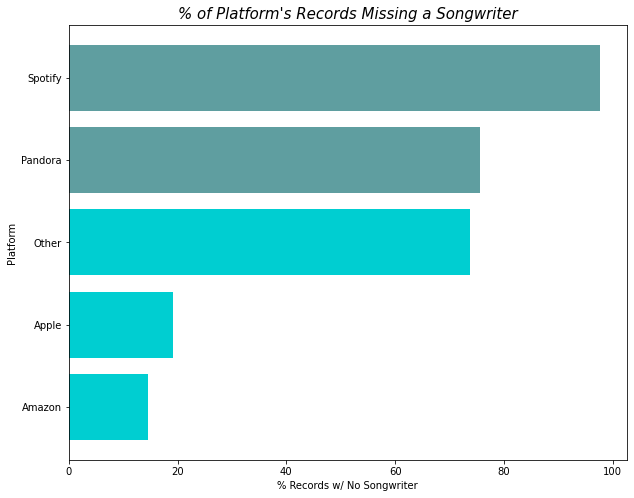

In [216]:
plt.subplots(figsize=(10, 8))
y=songwritersnewest['pct_missing_writer'] #test=music_df.loc[(music_df['UsePeriod']==' ')]
x=songwritersnewest['Platform']
plt.barh(x,sorted(y),align='center', color=['darkturquoise', 'darkturquoise','darkturquoise','cadetblue', 'cadetblue'])
plt.title('% of Platform\'s Records Missing a Songwriter', fontsize=15, fontstyle='oblique')
plt.ylabel('Platform')
plt.xlabel('% Records w/ No Songwriter')
#plt.bar(music_pie_agg['Platform'], sorted(music_pie_agg['Ratio']),color=['darkturquoise','darkturquoise', 'darkturquoise', 'cadetblue', 'cadetblue'])
plt.show()

In [18]:
music_null = music_df[music_df.isna().any(axis=1)] #filters to rows where there's at least one null value in any column
music_null.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),ListsWriters
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
26,GBAHS2100229,GB,AHS,21.0,NaN,YouTube,"12,560",Bad Bunny|Benito Antonio Martinez,Rimas Entertainment LLC,¿Quien Tu Eres?,X 100PRE,160,0


In [19]:
nulls=music_null.groupby(['Streaming Platform (DSP)'], as_index=False).agg({'ISRC':'count'})
nulls.head(15)

,Streaming Platform (DSP),ISRC
0,Amazon,0
1,Anghami,3
2,Apple,1412
3,AudioMack,534
4,Deezer,5
5,GTL,0
6,LiveXLive,33
7,Melodyv,0
8,Midwest Tape,47
9,MixCloud,4


In [20]:
music_df["ISRC"].fillna(" ", inplace = True)
music_df["Country Code"].fillna(" ", inplace = True)
music_df["Registrant Code"].fillna(" ", inplace = True)
music_df["Year of Reference"].fillna(" ", inplace = True)
music_df["Usage Period"].fillna(" ", inplace = True)
music_df["Streaming Platform (DSP)"].fillna(" ", inplace = True)
music_df["Streams"].fillna(" ", inplace = True)
music_df["Recording Artist"].fillna(" ", inplace = True)
music_df["Recording Label"].fillna(" ", inplace = True)
music_df["Recording Title"].fillna(" ", inplace = True)
music_df["Release Title"].fillna(" ", inplace = True)
music_df["Recording Duration (Seconds)"].fillna(" ", inplace = True)

In [21]:
music_df=music_df.set_axis(["ISRC","Country","Registrant","Year","UsePeriod","Platform","Streams","Artist","Label","RecordingName","ReleaseName","Length","ListsWriters"], axis=1)

In [22]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ISRC           100000 non-null  object
 1   Country        100000 non-null  object
 2   Registrant     100000 non-null  object
 3   Year           100000 non-null  object
 4   UsePeriod      100000 non-null  object
 5   Platform       100000 non-null  object
 6   Streams        100000 non-null  object
 7   Artist         100000 non-null  object
 8   Label          100000 non-null  object
 9   RecordingName  100000 non-null  object
 10  ReleaseName    100000 non-null  object
 11  Length         100000 non-null  int64 
 12  ListsWriters   100000 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.9+ MB


In [23]:
music_df.isnull().sum() #checks for null values across whole df 

ISRC             0
Country          0
Registrant       0
Year             0
UsePeriod        0
Platform         0
Streams          0
Artist           0
Label            0
RecordingName    0
ReleaseName      0
Length           0
ListsWriters     0
dtype: int64

In [24]:
music_df.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,"10,175",Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,,AudioMack,"62,105",Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0


In [25]:
music_df['Streams'] = music_df['Streams'].astype(str) #convert streams to string in order to replace comma
music_df['Streams']=music_df['Streams'].str.replace(',','') #replace comma with nothing
music_df['Streams'] = music_df['Streams'].astype(int) #convert to integer

In [26]:
music_df.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,10175,Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,,AudioMack,62105,Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0


In [27]:
test=music_df.loc[(music_df['UsePeriod']==' ')] #testing the difference between '' and ' ' -> I need to use ' ' to find blanks
test.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,10175,Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
4,USAT22007048,US,AT2,20.0,,AudioMack,62105,Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0
26,GBAHS2100229,GB,AHS,21.0,,YouTube,12560,Bad Bunny|Benito Antonio Martinez,Rimas Entertainment LLC,¿Quien Tu Eres?,X 100PRE,160,0


for ind, row in people_df.iterrows():
    print('working on row: ', ind) #as it works, it will return "working on row + the index number of the row its working on"
    if row['sibling_count'] == 0: #if sibling count is 0, list "only"
        people_df.loc[ind, 'birth_category'] = 'only'
    elif row['birth_order'] == 1: #if birth category is 1, and sibling count is not 0 (checked for this in the first step), "oldest"
        people_df.loc[ind, 'birth_category'] ='oldest'
    elif row['birth_order'] > row['sibling_count']: #birth order is higher than sibling count indicates youngest child
        people_df.loc[ind, 'birth_category'] ='youngest'
    else:
        people_df.loc[ind, 'birth_category'] ='middle'
print('finished!')

In [28]:
platformstreams=music_df.groupby(['Platform'], as_index=False).agg({'Streams':'sum'})
print(platformstreams.head())

    Platform       Streams
0             4.703908e+07
1     Amazon  1.511998e+08
2    Anghami  3.468200e+04
3      Apple  1.606454e+09
4  AudioMack  1.199156e+07


In [29]:
music_df.agg({'Streams':'sum'}) #total streams across all platforms 

Streams    5626550163
dtype: int64

In [30]:
topdsps=platformstreams[platformstreams['Platform'].isin(['Apple','Pandora','Spotify','Amazon'])]
topdsps.sort_values(by='Streams', ascending=False) 

,Platform,Streams
23,Spotify,2.552564e+09
3,Apple,1.606454e+09
16,Pandora,8.742366e+08
1,Amazon,1.511998e+08


AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

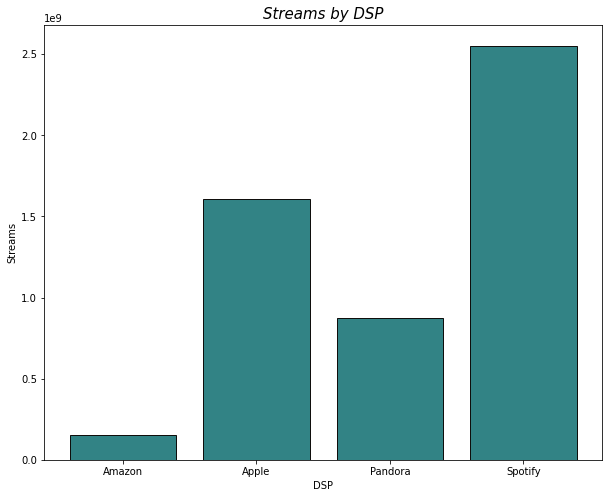

In [31]:
plt.subplots(figsize=(10, 8))
plt.bar(topdsps.Platform, topdsps.Streams, color="#328385", edgecolor="#0f0e0c")
plt.xlabel('DSP')
plt.ylabel('Streams')
plt.title(label='Streams by DSP', fontsize=15, fontstyle='oblique')
plt.fig.patch.set_alpha(0.7)
plt.show()